In [83]:
import pandas as pd 
import numpy as np 
import glob 
import re 
import os 

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Show the summary file for mean Moran's I for patch samples: 
tfl='/geosampling/rs_gidcls5/cdist10_r256sc1_mcomplex_sum/patchall_cls2_sum.csv'
dt=pd.read_csv(tfl)
dt.head()

,icls,tfl,m21_mean,e21_mean,p21_mean,m15_mean,e15_mean,p15_mean,m11_mean,e11_mean,p11_mean,m7_mean,e7_mean,p7_mean,m5_mean,e5_mean,p5_mean,e_all,m_all,p_all
0,2,/geosampling/rs_gidcls5/cdist10_r256sc1_mcompl...,0.564940,0.378199,0.384349,0.513250,0.381453,0.384381,0.475317,0.383419,0.384420,0.431364,0.384344,0.384506,0.405018,0.384509,0.384549,0.382385,0.477978,0.384441
1,2,/geosampling/rs_gidcls5/cdist10_r256sc1_mcompl...,0.182005,0.127748,0.125552,0.162767,0.126922,0.125884,0.149616,0.126514,0.126050,0.136528,0.126327,0.126168,0.130572,0.126288,0.126209,0.126760,0.152298,0.125973
2,2,/geosampling/rs_gidcls5/cdist10_r256sc1_mcompl...,0.115402,0.069817,0.069499,0.098869,0.069370,0.069146,0.087853,0.069104,0.068943,0.077311,0.068862,0.068767,0.072552,0.068754,0.068692,0.069182,0.090398,0.069009
3,2,/geosampling/rs_gidcls5/cdist10_r256sc1_mcompl...,0.055235,0.030138,0.028546,0.045900,0.029402,0.028690,0.039882,0.029091,0.028782,0.034076,0.028977,0.028843,0.031360,0.028924,0.028839,0.029306,0.041290,0.028740
4,2,/geosampling/rs_gidcls5/cdist10_r256sc1_mcompl...,0.866482,0.779318,0.779340,0.835840,0.779408,0.779419,0.815625,0.779451,0.779458,0.795620,0.779484,0.779487,0.786269,0.779497,0.779498,0.779431,0.819967,0.779440


In [26]:
#Show the samples with different Moran's I values 
lowdt=dt[(dt['m_all']<=0.1)]
middledt=dt[(dt['m_all']>0.45) & (dt['m_all']<0.55)]
highdt=dt[dt['m_all']>0.95]

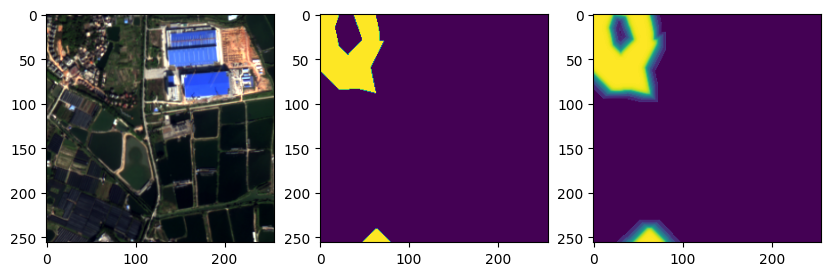

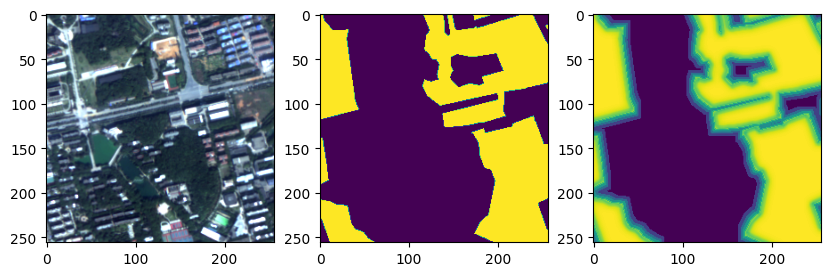

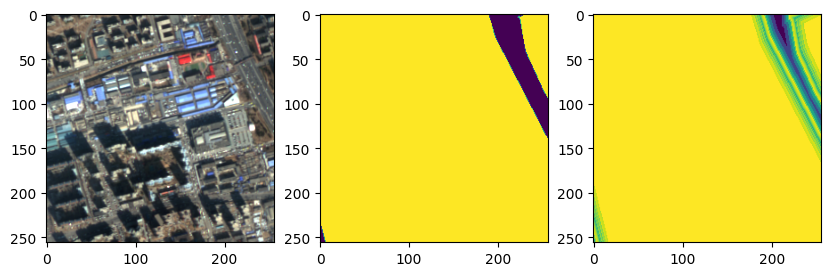

In [30]:
def showimg(tfl):
    adata=np.load(tfl)
    img=adata['img']
    mmoran=np.mean(np.array([adata['m21'],adata['m15'],
            adata['m11'],adata['m7'],adata['m5']]), axis=0)
    fig = plt.figure(figsize=(10, 7)) 
    fig.add_subplot(1, 3, 1) 
    plt.imshow(img)     
    fig.add_subplot(1, 3, 2) 
    plt.imshow(adata['mask']) 
    fig.add_subplot(1, 3, 3) 
    plt.imshow(mmoran) 
    
tfl=lowdt.iloc[0]['tfl']
showimg(tfl)
tfl=middledt.iloc[0]['tfl']
showimg(tfl)
tfl=highdt.iloc[0]['tfl']
showimg(tfl)

In [34]:
#Meta model learning
!python3.8 memaseg.py --learn-inner-lrs --gpu 0 --batch-size 12 --num-group 1 --num-support 10  --num-query 10  --num-inner-steps 3   --init-inner-lr 0.1 --outer-lr 0.005 --num-train-iterations 3 --iloop-batch 10  --oloop-batch 3  --log-dir /tmp/test1 

2023-12-14 05:13:27.901847: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-14 05:13:27.942890: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 05:13:28.540816: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
{'--batch-size': '12',
 '--checkpoint-step': '-1',
 '--gpu': '0',
 '--help': False,
 '--iloop-batch': '10',
 '--init-inner-lr': '0.1',
 '--learn-inner-lrs': True,
 '--log-dir': '/tmp/test1',
 '--log-interval': '2',
 '--num-group': '1',
 '--num-inner-

In [36]:
#Transfer learning for pretrained meta UNet 
!python3.8 finetune_transfer_gid5.py --gpu 0 --model-type meta_train --train-prp 0.1 --test-prp 0.05 --pretrain-mode all --n-epoch 2 --log-dir /tmp/transfer_train

2023-12-14 05:27:51.891762: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-14 05:27:51.932775: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 05:27:52.497908: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
{'--batch-size': '12',
 '--con-opt': None,
 '--con-opt-w': None,
 '--gpu': '0',
 '--help': False,
 '--log-dir': '/tmp/transfer_train',
 '--loss-weight': None,
 '--model-type': 'meta_train',
 '--n-epoch': '2',
 '--pretrain-mode': 'all',
 '--seed': '0'

In [38]:
#Making semantic segmentation predictions based on finetuned pretrained models  
!python3.8 finetunedmodel_predict.py

2023-12-14 05:33:14.157526: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-14 05:33:14.198619: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 05:33:14.831981: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [81]:
prepath='/geosampling/predict3/*.npz'
allfiles=glob.glob(prepath)
allfroot=[re.sub('_imgcomask.*','',os.path.basename(f)) for f in allfiles]
usemodel=[re.sub('.*imgcomask_m_|__[0-9]{1,9}.*','',os.path.basename(f)) for f in allfiles]
iou=[float(re.sub('.*iou1_|.npz','',os.path.basename(f))) for f in allfiles]
allflsDf=pd.DataFrame({'fl':allfiles,'model':usemodel,'root':allfroot,'iou':iou}) 
allflsDf.head()

,fl,model,root,iou
0,/geosampling/predict3/GF2_PMS2__L1A0001490885-...,unet,GF2_PMS2__L1A0001490885-MSS2-142,0.70
1,/geosampling/predict3/GF2_PMS1__L1A0001217916-...,unet,GF2_PMS1__L1A0001217916-MSS1-621,0.71
2,/geosampling/predict3/GF2_PMS2__L1A0001448894-...,segformer_decoder,GF2_PMS2__L1A0001448894-MSS2-1178,0.63
3,/geosampling/predict3/GF2_PMS1__L1A0000575925-...,meta_train,GF2_PMS1__L1A0000575925-MSS1-57,0.66
4,/geosampling/predict3/GF2_PMS2__L1A0001416129-...,segformer_full,GF2_PMS2__L1A0001416129-MSS2-841,0.53


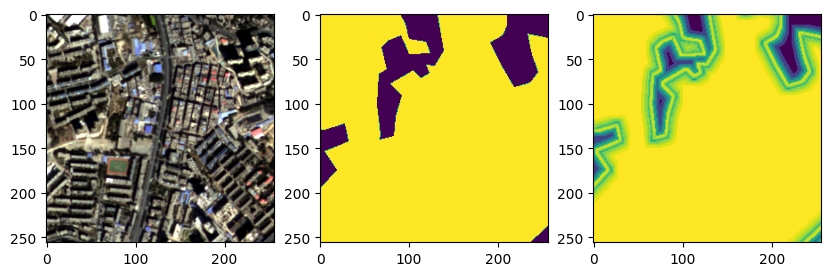

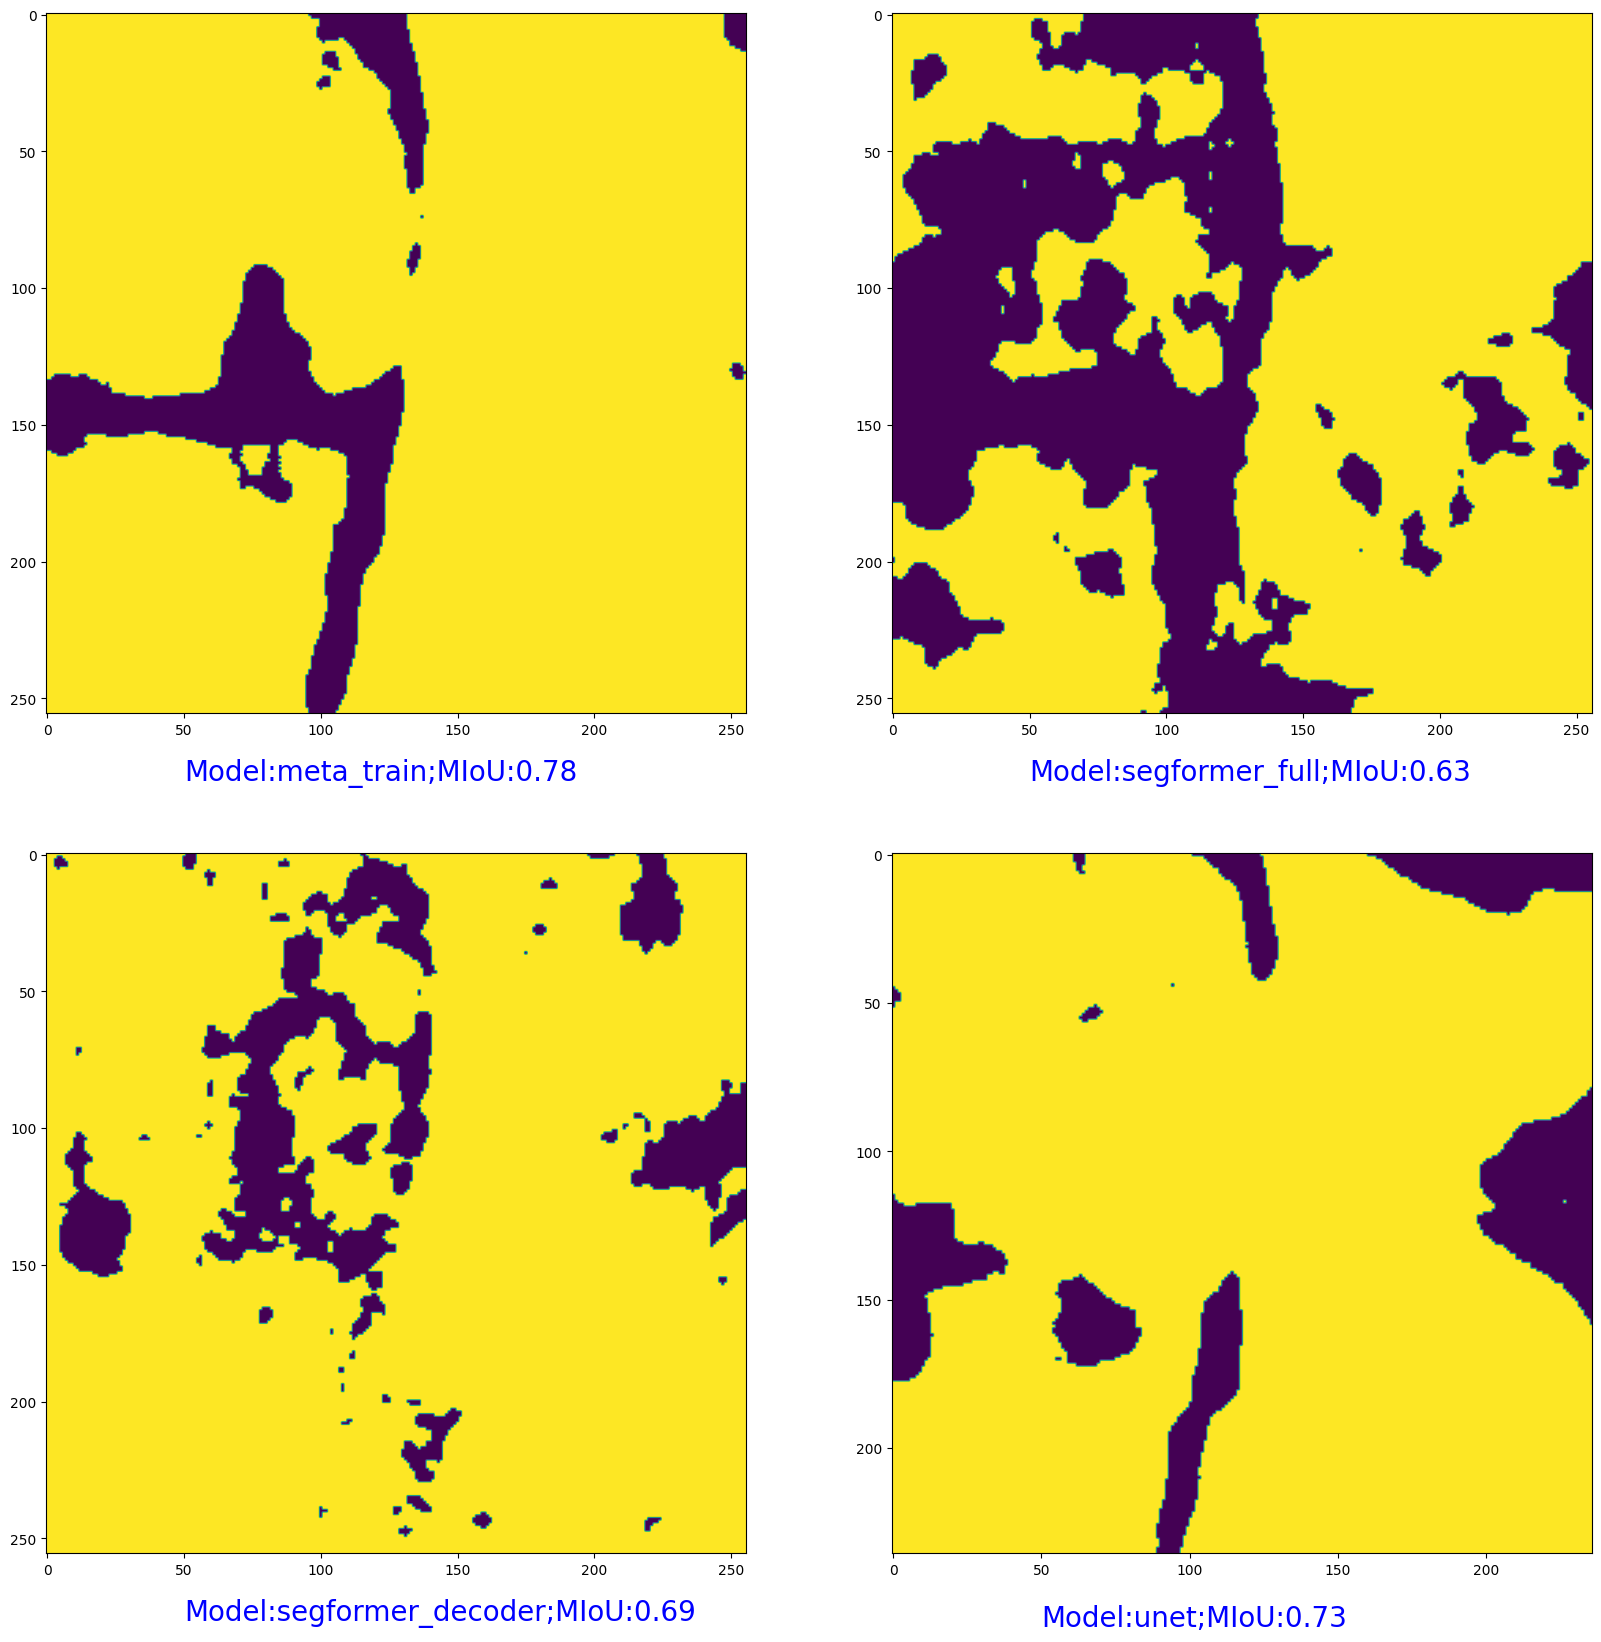

In [82]:
#Show the predicted results and original image and mask 
rootfl='GF2_PMS2__L1A0001821754-MSS2-938'
imgmask='/geosampling/rs_gidcls5/cdist10_r256sc1_mcomplex/2/'+rootfl+'_imgcomask.npz'
showimg(imgmask)

def showpredictions(allflsDf,aroot):
    aDf=allflsDf[allflsDf['root']==aroot]
    if aDf.shape[0]==0:
        return 
    models=['meta_train','segformer_full','segformer_decoder','unet']
    fig = plt.figure(figsize=(20, 20)) 
    for i,m in enumerate(models): 
        aDfM=aDf[aDf['model']==m]
        if aDfM.shape[0]==0:
            continue 
        tfl=aDfM['fl'].values[0]
        miou=round(aDfM['iou'].values[0],2)
        adata=np.load(tfl)
        premask=adata['premask']
        fig.add_subplot(2,2, i+1) 
        plt.imshow(premask)
        y=280 if m !='unet' else 260
        plt.text(50, y, 'Model:'+m+';MIoU:'+str(miou),fontsize=20,color='blue')
showpredictions(allflsDf,rootfl)